In [21]:
import os

DATA_FOLDER = os.path.join('..', 'data')
FIGURE_FOLDER = os.path.join('..', 'figures')

notebook_name = '000_filter_for_differentially_localized_proteins'

data_folder = os.path.join(DATA_FOLDER, notebook_name)
figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)

! mkdir -p $data_folder
! mkdir -p $figure_folder

input_folder = os.path.join(DATA_FOLDER, '00_original')

In [22]:
import pandas as pd
import numpy as np

txt = os.path.join(input_folder, 'Annotation granularity levels.txt')
granularity = pd.read_table(txt)
print(granularity.shape)
granularity.head()

(29, 3)


,Level A,Level B,Level C
0,Nucleus,Nucleoplasm,Nucleus
1,Nucleoplasm,Nucleoplasm,Nucleus
2,Nuclear bodies,Nuclear bodies,Nucleus
3,Nuclear speckles,Nuclear bodies,Nucleus
4,Nuclear membrane,Nuclear membrane,Nucleus


In [23]:
pd.options.display.max_columns = 50

In [89]:
LOCALIZATION_INDEX = 'antibody_id'

txt = os.path.join(input_folder, 'antibody_celline_location_v17.txt')
localization = pd.read_table(txt)
localization = localization.set_index(LOCALIZATION_INDEX)
print(localization.shape)
localization.head()

(33456, 39)


,ensg_id,gene_name,uniprot_id,prest_id,aa_sequencing_sequence,tissue_name,Actin_filaments,Aggresome,Cell_Junctions,Centrosome,Cytokinetic_bridge,Cytoplasmic_bodies,Cytosol,Endoplasmic_reticulum,Endosomes,Focal_adhesion_sites,Golgi_apparatus,Intermediate_filaments,Lipid_droplets,Lysosomes,Microtubule_ends,Microtubule_organizing_center,Microtubules,Midbody,Midbody_ring,Mitochondria,Mitotic_spindle,Nuclear_bodies,Nuclear_membrane,Nuclear_speckles,Nucleoli,Nucleoli_fibrillar_center,Nucleoli_fibrillar_center.1,Nucleoplasm,Nucleus,Peroxisomes,Plasma_membrane,Rods_Rings,Vesicles
antibody_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167,ENSG00000130830,MPP1,Q00013,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
167,ENSG00000130830,MPP1,Q00013,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-2 OS,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
167,ENSG00000130830,MPP1,Q00013,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-251 MG,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
243,ENSG00000036473,OTC,P00480,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
243,ENSG00000036473,OTC,P00480,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,U-2 OS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
nfc1 = localization['Nucleoli_fibrillar_center']
nfc2 = localization['Nucleoli_fibrillar_center.1']


(nfc1 == nfc2).all()

True

Drop second nucleoli fibrillar center

In [91]:
localization = localization.drop(columns=['Nucleoli_fibrillar_center.1'], errors='ignore')

In [92]:
len(localization.index.unique())

13059

In [93]:
all_metadata_cols = set(['ensg_id', 'gene_name', 'uniprot_id', 'prest_id', 'aa_sequencing_sequence', 'tissue_name', 'antibody_id'])
metadata_cols = list(all_metadata_cols.difference([LOCALIZATION_INDEX]))

metadata = localization[metadata_cols]
metadata = metadata.drop_duplicates()
metadata = metadata.sort_index()
print(metadata.shape)
metadata.head()

(33456, 6)


,prest_id,tissue_name,ensg_id,gene_name,uniprot_id,aa_sequencing_sequence
antibody_id,,,,,,
167,231776,A-431,ENSG00000130830,MPP1,Q00013,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...
167,231776,U-2 OS,ENSG00000130830,MPP1,Q00013,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...
167,231776,U-251 MG,ENSG00000130830,MPP1,Q00013,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...
243,230049,A-431,ENSG00000036473,OTC,P00480,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...
243,230049,U-2 OS,ENSG00000036473,OTC,P00480,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...


In [94]:
metadata_multiple_seqs = metadata.groupby(level=0).filter(lambda x: len(x['aa_sequencing_sequence'].unique()) != 1)
print(metadata_multiple_seqs.shape)
metadata_multiple_seqs = metadata_multiple_seqs.sort_index()
print(len(metadata_multiple_seqs.index.unique()))
metadata_multiple_seqs.head()

(0, 6)
0


,prest_id,tissue_name,ensg_id,gene_name,uniprot_id,aa_sequencing_sequence
antibody_id,,,,,,


In [95]:
localization.head()

,ensg_id,gene_name,uniprot_id,prest_id,aa_sequencing_sequence,tissue_name,Actin_filaments,Aggresome,Cell_Junctions,Centrosome,Cytokinetic_bridge,Cytoplasmic_bodies,Cytosol,Endoplasmic_reticulum,Endosomes,Focal_adhesion_sites,Golgi_apparatus,Intermediate_filaments,Lipid_droplets,Lysosomes,Microtubule_ends,Microtubule_organizing_center,Microtubules,Midbody,Midbody_ring,Mitochondria,Mitotic_spindle,Nuclear_bodies,Nuclear_membrane,Nuclear_speckles,Nucleoli,Nucleoli_fibrillar_center,Nucleoplasm,Nucleus,Peroxisomes,Plasma_membrane,Rods_Rings,Vesicles
antibody_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167,ENSG00000130830,MPP1,Q00013,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
167,ENSG00000130830,MPP1,Q00013,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-2 OS,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
167,ENSG00000130830,MPP1,Q00013,231776,TEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIE...,U-251 MG,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
243,ENSG00000036473,OTC,P00480,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,A-431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
243,ENSG00000036473,OTC,P00480,230049,ILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQA...,U-2 OS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
cols = localization.columns.difference(metadata.columns).append(pd.Index(['tissue_name']))
cell_line_localization = localization[cols]
cell_line_localization = cell_line_localization.set_index('tissue_name', append=True)
cell_line_localization = cell_line_localization.sort_index()
cell_line_localization = cell_line_localization.astype(bool)
print(cell_line_localization.shape)
cell_line_localization.head()

(33456, 32)


Actin_filaments  Aggresome  Cell_Junctions  \
antibody_id tissue_name                                               
167         A-431                  False      False           False   
            U-2 OS                 False      False           False   
            U-251 MG               False      False           False   
243         A-431                  False      False           False   
            U-2 OS                 False      False           False   

                         Centrosome  Cytokinetic_bridge  Cytoplasmic_bodies  \
antibody_id tissue_name                                                       
167         A-431             False               False               False   
            U-2 OS            False               False               False   
            U-251 MG          False               False               False   
243         A-431             False               False               False   
            U-2 OS            False               False               False   

                         Cytosol  Endoplasmic_reticulum  Endosomes  \
antibody_id tissue_name                                              
167         A-431          False                  False      False   
            U-2 OS          True                  False      False   
            U-251 MG        True                  False      False   
243         A-431          False                  False      False   
            U-2 OS         False                  False      False   

                         Focal_adhesion_sites  Golgi_apparatus  \
antibody_id tissue_name                                          
167         A-431                       False            False   
            U-2 OS                      False            False   
            U-251 MG                    False            False   
243         A-431                       False            False   
            U-2 OS                      False            False   

                         Intermediate_filaments  Lipid_droplets  Lysosomes  \
antibody_id tissue_name                                                      
167         A-431                         False           False      False   
            U-2 OS                        False           False      False   
            U-251 MG                      False           False      False   
243         A-431                         False           False      False   
            U-2 OS                        False           False      False   

                         Microtubule_ends  Microtubule_organizing_center  \
antibody_id tissue_name                                                    
167         A-431                   False                          False   
            U-2 OS                  False                          False   
            U-251 MG                False                          False   
243         A-431                   False                          False   
            U-2 OS                  False                          False   

                         Microtubules  Midbody  Midbody_ring  Mitochondria  \
antibody_id tissue_name                                                      
167         A-431               False    False         False         False   
            U-2 OS              False    False         False         False   
            U-251 MG            False    False         False         False   
243         A-431               False    False         False          True   
            U-2 OS              False    False         False          True   

                         Mitotic_spindle  Nuclear_bodies  Nuclear_membrane  \
antibody_id tissue_name                                                      
167         A-431                  False           False             False   
            U-2 OS                 False           False             False   
            U-251 MG               False           False             False   
24

In [97]:
cell_line_localization_tidy = cell_line_localization.replace(False, np.nan).stack().reset_index()
cell_line_localization_tidy = cell_line_localization_tidy.dropna()
cell_line_localization_tidy = cell_line_localization_tidy.drop(columns=[0])
cell_line_localization_tidy = cell_line_localization_tidy.rename(columns={"level_2": "cellular_component"})
print(cell_line_localization_tidy.shape)
cell_line_localization_tidy["level_a"] = cell_line_localization_tidy['cellular_component'].map(lambda x: x.lower())
cell_line_localization_tidy.head(10)

(50095, 3)


,antibody_id,tissue_name,cellular_component,level_a
0,167,A-431,Nuclear_speckles,nuclear_speckles
1,167,U-2 OS,Cytosol,cytosol
2,167,U-2 OS,Nuclear_speckles,nuclear_speckles
3,167,U-251 MG,Cytosol,cytosol
4,167,U-251 MG,Nuclear_speckles,nuclear_speckles
5,243,A-431,Mitochondria,mitochondria
6,243,U-2 OS,Mitochondria,mitochondria
7,243,U-251 MG,Mitochondria,mitochondria
8,244,MCF7,Nucleoplasm,nucleoplasm
9,244,U-2 OS,Nucleoplasm,nucleoplasm


## Add granularity

In [101]:
txt = os.path.join(input_folder, 'Annotation granularity levels.txt')
granularity = pd.read_table(txt)
print(granularity.shape)
granularity

(29, 3)


,Level A,Level B,Level C
0,Nucleus,Nucleoplasm,Nucleus
1,Nucleoplasm,Nucleoplasm,Nucleus
2,Nuclear bodies,Nuclear bodies,Nucleus
3,Nuclear speckles,Nuclear bodies,Nucleus
4,Nuclear membrane,Nuclear membrane,Nucleus
5,Nucleoli,Nucleoli,Nucleoli
6,Nucleoli (Fibrillar center),Nucleoli,Nucleoli
7,Cytosol,Cytosol,Cytoplasm
8,Cytoplasmic bodies,Cytoplasmic bodies,Cytoplasm
9,Rods and Rings,Cytoplasmic bodies,Cytoplasm


In [102]:
granularity_v2 = granularity.applymap(lambda x: x.lower().replace(' ', '_').replace('(', '').replace(')', ''))
granularity_v2['Level B'] = granularity_v2['Level B'].replace('mtoc', 'microtubule_organizing_center')
granularity_v2

,Level A,Level B,Level C
0,nucleus,nucleoplasm,nucleus
1,nucleoplasm,nucleoplasm,nucleus
2,nuclear_bodies,nuclear_bodies,nucleus
3,nuclear_speckles,nuclear_bodies,nucleus
4,nuclear_membrane,nuclear_membrane,nucleus
5,nucleoli,nucleoli,nucleoli
6,nucleoli_fibrillar_center,nucleoli,nucleoli
7,cytosol,cytosol,cytoplasm
8,cytoplasmic_bodies,cytoplasmic_bodies,cytoplasm
9,rods_and_rings,cytoplasmic_bodies,cytoplasm


In [103]:
level_a_to_b = pd.Series(index=granularity_v2['Level A'], data=granularity_v2['Level B'].values)
level_a_to_b

Level A
nucleus                                            nucleoplasm
nucleoplasm                                        nucleoplasm
nuclear_bodies                                  nuclear_bodies
nuclear_speckles                                nuclear_bodies
nuclear_membrane                              nuclear_membrane
nucleoli                                              nucleoli
nucleoli_fibrillar_center                             nucleoli
cytosol                                                cytosol
cytoplasmic_bodies                          cytoplasmic_bodies
rods_and_rings                              cytoplasmic_bodies
lipid_droplets                                        vesicles
aggresome                                   cytoplasmic_bodies
mitochondria                                      mitochondria
microtubules                                      microtubules
microtubule_ends                                  microtubules
microtubule_organizing_center    microtubule_or

In [104]:
level_a_to_c = pd.Series(index=granularity_v2['Level A'], data=granularity_v2['Level C'].values)
level_a_to_c

Level A
nucleus                                  nucleus
nucleoplasm                              nucleus
nuclear_bodies                           nucleus
nuclear_speckles                         nucleus
nuclear_membrane                         nucleus
nucleoli                                nucleoli
nucleoli_fibrillar_center               nucleoli
cytosol                                cytoplasm
cytoplasmic_bodies                     cytoplasm
rods_and_rings                         cytoplasm
lipid_droplets                         secretory
aggresome                              cytoplasm
mitochondria                           cytoplasm
microtubules                           filaments
microtubule_ends                       filaments
microtubule_organizing_center          filaments
centrosome                             filaments
mitotic_spindle                        filaments
cytokinetic_bridge                     filaments
midbody                                filaments
midbody_ring

In [105]:
cell_line_localization_tidy['level_b'] = cell_line_localization_tidy['level_a'].map(level_a_to_b)
cell_line_localization_tidy['level_c'] = cell_line_localization_tidy['level_a'].map(level_a_to_c)
cell_line_localization_tidy.head(20)

,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c
0,167,A-431,Nuclear_speckles,nuclear_speckles,nuclear_bodies,nucleus
1,167,U-2 OS,Cytosol,cytosol,cytosol,cytoplasm
2,167,U-2 OS,Nuclear_speckles,nuclear_speckles,nuclear_bodies,nucleus
3,167,U-251 MG,Cytosol,cytosol,cytosol,cytoplasm
4,167,U-251 MG,Nuclear_speckles,nuclear_speckles,nuclear_bodies,nucleus
5,243,A-431,Mitochondria,mitochondria,mitochondria,cytoplasm
6,243,U-2 OS,Mitochondria,mitochondria,mitochondria,cytoplasm
7,243,U-251 MG,Mitochondria,mitochondria,mitochondria,cytoplasm
8,244,MCF7,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus
9,244,U-2 OS,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus


### SAVE tidy version of localization and metadata to file

Have the v17 version of the database so put it in the name

In [148]:
csv = os.path.join(data_folder, 'v17_antibody_localization_tidy.csv')
cell_line_localization_tidy.to_csv(csv, index=False)

csv = os.path.join(data_folder, 'v17_antibody_metadata.csv')
metadata.to_csv(csv)
!ls -lha $data_folder

total 7.3M
drwxrwxr-x 2 ubuntu ubuntu 4.0K May 16 20:26 .
drwxrwxr-x 6 ubuntu ubuntu 4.0K May 16 20:09 ..
-rw-rw-r-- 1 ubuntu ubuntu 2.8M May 16 20:31 v17_antibody_localization_tidy.csv
-rw-rw-r-- 1 ubuntu ubuntu 4.5M May 16 20:31 v17_antibody_metadata.csv


## Get only singly localized proteins

Many of the Antibodies have multiple localizations per cell type

In [110]:
single_localization_per_celltype = cell_line_localization_tidy.groupby(LOCALIZATION_INDEX).filter(
    lambda x: len(x['tissue_name']) == len(x['tissue_name'].unique()))
print(single_localization_per_celltype.shape)
single_localization_per_celltype.head(20)

(14579, 6)


,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c
5,243,A-431,Mitochondria,mitochondria,mitochondria,cytoplasm
6,243,U-2 OS,Mitochondria,mitochondria,mitochondria,cytoplasm
7,243,U-251 MG,Mitochondria,mitochondria,mitochondria,cytoplasm
8,244,MCF7,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus
9,244,U-2 OS,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus
10,244,U-251 MG,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus
33,265,HaCaT,Vesicles,vesicles,vesicles,secretory
34,265,HeLa,Vesicles,vesicles,vesicles,secretory
35,265,U-2 OS,Vesicles,vesicles,vesicles,secretory
36,266,A-431,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus


How many antibodies ids have only one localization per cell?


In [149]:
len(single_localization_per_celltype[LOCALIZATION_INDEX].unique())

6079

Remove antibodies tested in only one tissue

In [112]:
multiple_tissues_tested = single_localization_per_celltype.groupby(LOCALIZATION_INDEX).filter(lambda x: len(x['tissue_name']) > 1) 
print(multiple_tissues_tested.shape)
print(len(multiple_tissues_tested[LOCALIZATION_INDEX].unique()))
multiple_tissues_tested.head()

(13553, 6)
5053


,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c
5,243,A-431,Mitochondria,mitochondria,mitochondria,cytoplasm
6,243,U-2 OS,Mitochondria,mitochondria,mitochondria,cytoplasm
7,243,U-251 MG,Mitochondria,mitochondria,mitochondria,cytoplasm
8,244,MCF7,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus
9,244,U-2 OS,Nucleoplasm,nucleoplasm,nucleoplasm,nucleus


Find ENSG ids with more than one cellular component

In [113]:
multiple_tissues_tested.groupby(LOCALIZATION_INDEX).apply(lambda x: len(x['cellular_component'].unique())).head()

antibody_id
243    1
244    1
265    1
266    1
285    1
dtype: int64

In [114]:
multiple_tissues_tested.groupby(LOCALIZATION_INDEX).apply(lambda x: len(x['cellular_component'])).head()

antibody_id
243    3
244    3
265    3
266    3
285    3
dtype: int64

In [122]:
differential_cell_line_localization = multiple_tissues_tested.groupby(LOCALIZATION_INDEX).filter(
    lambda x: len(x['cellular_component'].unique()) > 1)
print(differential_cell_line_localization.shape)
print(len(differential_cell_line_localization[LOCALIZATION_INDEX].unique()))
differential_cell_line_localization.head(20)

(373, 6)
144


,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c
256,634,A-431,Microtubules,microtubules,microtubules,filaments
257,634,U-2 OS,Microtubules,microtubules,microtubules,filaments
258,634,U-251 MG,Cytosol,cytosol,cytosol,cytoplasm
563,951,A-431,Cell_Junctions,cell_junctions,plasma_membrane,plasma_membrane
564,951,ASC TERT1,Vesicles,vesicles,vesicles,secretory
910,1338,A-431,Plasma_membrane,plasma_membrane,plasma_membrane,plasma_membrane
911,1338,U-2 OS,Cytosol,cytosol,cytosol,cytoplasm
912,1338,U-251 MG,Cytosol,cytosol,cytosol,cytoplasm
1293,1767,A-431,Cytosol,cytosol,cytosol,cytoplasm
1294,1767,CACO-2,Cell_Junctions,cell_junctions,plasma_membrane,plasma_membrane


In [124]:
from collections import Counter

multiple_localization_names = differential_cell_line_localization.groupby(LOCALIZATION_INDEX).apply(lambda x: ' - '.join(sorted(x['cellular_component'].unique()))).reset_index()
multiple_localization_names = multiple_localization_names.rename(columns={0: 'cellular_components'})
multiple_localization_names.head()


,antibody_id,cellular_components
0,634,Cytosol - Microtubules
1,951,Cell_Junctions - Vesicles
2,1338,Cytosol - Plasma_membrane
3,1767,Cell_Junctions - Cytosol
4,1794,Actin_filaments - Cytosol


In [125]:
Counter(multiple_localization_names['cellular_components'])

Counter({'Cytosol - Microtubules': 5,
         'Cell_Junctions - Vesicles': 2,
         'Cytosol - Plasma_membrane': 10,
         'Cell_Junctions - Cytosol': 5,
         'Actin_filaments - Cytosol': 4,
         'Cytosol - Golgi_apparatus': 8,
         'Cytosol - Nucleoplasm': 8,
         'Cytosol - Endoplasmic_reticulum': 11,
         'Intermediate_filaments - Nucleoplasm': 1,
         'Intermediate_filaments - Mitochondria': 1,
         'Cytosol - Nucleus': 4,
         'Cytosol - Vesicles': 21,
         'Cytosol - Nucleoli': 1,
         'Mitochondria - Vesicles': 2,
         'Centrosome - Cytosol': 4,
         'Endoplasmic_reticulum - Mitochondria': 1,
         'Cytosol - Midbody': 1,
         'Nucleoplasm - Vesicles': 2,
         'Cytosol - Intermediate_filaments': 6,
         'Nucleoli - Vesicles': 1,
         'Intermediate_filaments - Nucleus': 1,
         'Mitochondria - Nucleoplasm': 1,
         'Cytokinetic_bridge - Nucleus': 1,
         'Golgi_apparatus - Intermediate_filaments

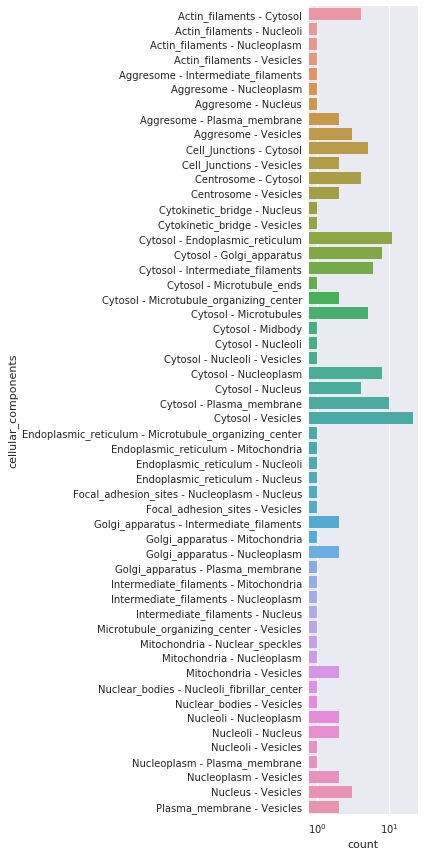

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook')
%matplotlib inline

unique_locations = sorted(multiple_localization_names['cellular_components'].unique())

fig, ax = plt.subplots(figsize=(6, 12))
ax.set_xscale('log')
sns.countplot(y='cellular_components', 
              data=multiple_localization_names, order=unique_locations)
fig.tight_layout()
pdf = os.path.join(figure_folder, 'multiple_localizations_across_cell_lines.pdf')
fig.savefig(pdf)

Seems like a lot of within-order switching

In [127]:
type(('Nucleoli', 'Nucleoli fibrillar center'))

tuple

In [128]:
type({'Nucleoli', 'Nucleoli fibrillar center'})

set

In [129]:
{'Nuclear membrane'}

{'Nuclear membrane'}

In [130]:
cellular_component_orders = {
    'Nuclear membrane': {'Nuclear membrane',},
    'Nucleoli': {'Nucleoli', 'Nucleoli fibrillar center'},
    'Nucleoplasm': {'Nucleoplasm', 'Nuclear bodies', 'Nuclear speckles', 'Nucleus'},
    'Actin filaments': {'Actin filaments', 'Focal adhesion sites'},
    'Centrosome': {'Centrosome', 'Microtubule organizing center'},
    'Cytosol': {'Aggresome', 'Cytoplasmic bodies', 'Cytosol', 'Rods & rings'},
    'Intermediate filaments': {'Intermediate filaments'},
    'Microtubules': {'Cleavage furrow', 'Cytokinetic bridge', 'Microtubule ends', 'Microtubules', 
         'Midbody', 'Midbody ring', 'Mitotic spindle'},
    'Mitochondria': {'Mitochondria',},
    'Endoplasmic reticulum': {'Endoplasmic reticulum',},
    'Golgi apparatus': {'Golgi apparatus',},
    'Plasma membrane': {'Cell junctions', 'Plasma membrane'},
    'Secreted proteins': {'Secreted proteins',},
    'Vesicles': {'Endosomes', 'Lipid droplets', 'Lysosomes', 'Peroxisomes', 'Vesicles'}
}
cellular_component_orders = {k: set(map(lambda x: x.lower().replace(' ', '_'), v)) 
                             for k, v in cellular_component_orders.items()}
cellular_component_orders

{'Nuclear membrane': {'nuclear_membrane'},
 'Nucleoli': {'nucleoli', 'nucleoli_fibrillar_center'},
 'Nucleoplasm': {'nuclear_bodies',
  'nuclear_speckles',
  'nucleoplasm',
  'nucleus'},
 'Actin filaments': {'actin_filaments', 'focal_adhesion_sites'},
 'Centrosome': {'centrosome', 'microtubule_organizing_center'},
 'Cytosol': {'aggresome', 'cytoplasmic_bodies', 'cytosol', 'rods_&_rings'},
 'Intermediate filaments': {'intermediate_filaments'},
 'Microtubules': {'cleavage_furrow',
  'cytokinetic_bridge',
  'microtubule_ends',
  'microtubules',
  'midbody',
  'midbody_ring',
  'mitotic_spindle'},
 'Mitochondria': {'mitochondria'},
 'Endoplasmic reticulum': {'endoplasmic_reticulum'},
 'Golgi apparatus': {'golgi_apparatus'},
 'Plasma membrane': {'cell_junctions', 'plasma_membrane'},
 'Secreted proteins': {'secreted_proteins'},
 'Vesicles': {'endosomes',
  'lipid_droplets',
  'lysosomes',
  'peroxisomes',
  'vesicles'}}

In [134]:
def count_cellular_component_orders(locations):
    n_orders = 0
    for name, subnames in cellular_component_orders.items():
        if len(subnames.intersection(locations)) > 0:
            n_orders += 1
    return n_orders

differential_cell_line_localization['cellular_component_lower'] = differential_cell_line_localization['cellular_component'].str.lower()
n_orders = differential_cell_line_localization.groupby(LOCALIZATION_INDEX)['cellular_component_lower'].apply(count_cellular_component_orders)
n_orders.head()

/home/ubuntu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


antibody_id
634     2
951     2
1338    2
1767    2
1794    2
Name: cellular_component_lower, dtype: int64

In [135]:
n_orders.unique()

array([2, 3])

In [136]:
ids_with_three_orders = n_orders[n_orders == 3].index
for x in ids_with_three_orders:
    print(x)

53639


In [137]:
differential_cell_line_localization.query('@LOCALIZATION_INDEX in @ids_with_three_orders')

,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c,cellular_component_lower


In [140]:
cross_order_differential = differential_cell_line_localization.groupby(LOCALIZATION_INDEX).filter(
    lambda x: count_cellular_component_orders(x['cellular_component_lower']) > 1)
print(cross_order_differential.shape)
print(len(cross_order_differential[LOCALIZATION_INDEX].unique()))
cross_order_differential.head()

(373, 7)
144


,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c,cellular_component_lower
256,634,A-431,Microtubules,microtubules,microtubules,filaments,microtubules
257,634,U-2 OS,Microtubules,microtubules,microtubules,filaments,microtubules
258,634,U-251 MG,Cytosol,cytosol,cytosol,cytoplasm,cytosol
563,951,A-431,Cell_Junctions,cell_junctions,plasma_membrane,plasma_membrane,cell_junctions
564,951,ASC TERT1,Vesicles,vesicles,vesicles,secretory,vesicles


In [141]:
from collections import Counter


cross_order_names = cross_order_differential.groupby(LOCALIZATION_INDEX).apply(lambda x: ' - '.join(sorted(x['cellular_component'].unique()))).reset_index()
cross_order_names = cross_order_names.rename(columns={0: 'cellular_components'})
cross_order_names.head()


,antibody_id,cellular_components
0,634,Cytosol - Microtubules
1,951,Cell_Junctions - Vesicles
2,1338,Cytosol - Plasma_membrane
3,1767,Cell_Junctions - Cytosol
4,1794,Actin_filaments - Cytosol


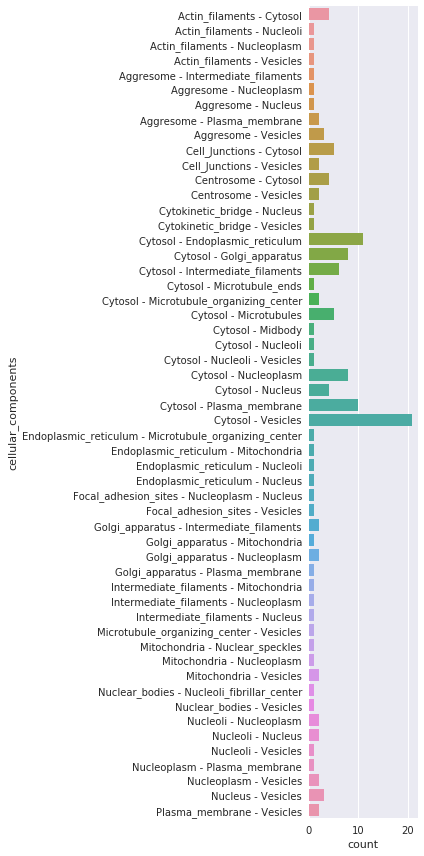

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook')
%matplotlib inline

unique_locations = sorted(cross_order_names['cellular_components'].unique())

fig, ax = plt.subplots(figsize=(6, 12))
# ax.set_xscale('log')
sns.countplot(y='cellular_components', 
              data=cross_order_names, order=unique_locations)
fig.tight_layout()
pdf = os.path.join(figure_folder, 'multiple_localizations_across_cell_lines_cross_order.pdf')
fig.savefig(pdf)

In [144]:
# differential_cell_line_localization.query('ensg_id == "ENSG00000253537"')

In [145]:
differential_cell_line_localization = multiple_tissues_tested.groupby(LOCALIZATION_INDEX).filter(
    lambda x: len(x['level_c'].unique()) > 1)
print(differential_cell_line_localization.shape)
print(len(differential_cell_line_localization[LOCALIZATION_INDEX].unique()))
differential_cell_line_localization.head(20)

(373, 6)
144


,antibody_id,tissue_name,cellular_component,level_a,level_b,level_c
256,634,A-431,Microtubules,microtubules,microtubules,filaments
257,634,U-2 OS,Microtubules,microtubules,microtubules,filaments
258,634,U-251 MG,Cytosol,cytosol,cytosol,cytoplasm
563,951,A-431,Cell_Junctions,cell_junctions,plasma_membrane,plasma_membrane
564,951,ASC TERT1,Vesicles,vesicles,vesicles,secretory
910,1338,A-431,Plasma_membrane,plasma_membrane,plasma_membrane,plasma_membrane
911,1338,U-2 OS,Cytosol,cytosol,cytosol,cytoplasm
912,1338,U-251 MG,Cytosol,cytosol,cytosol,cytoplasm
1293,1767,A-431,Cytosol,cytosol,cytosol,cytoplasm
1294,1767,CACO-2,Cell_Junctions,cell_junctions,plasma_membrane,plasma_membrane


In [ ]:
# def check_differential_localization(df):
#     return df.apply(lambda x: len(x.unique()) != 1)

# is_differentially_localized = cell_line_localization.groupby(level=0, axis=0).apply(check_differential_localization)
# print(is_differentially_localized.shape)
# is_differentially_localized.head()

# differential_localization = is_differentially_localized.loc[is_differentially_localized.any(axis=1), :]
# print(differential_localization.shape)
# differential_localization.head()

# Are all compartments fair game for differential localization?

# differential_localization.any()

# differential_localization.sum()

# differential_localization_na = differential_localization.replace(False, np.nan)
# differential_localization_na = differential_localization_na.dropna(how='all', axis=1)
# print(differential_localization_na.shape)
# differential_localization_na.head()

# differential_localization_tidy = differential_localization_na.unstack().reset_index()
# print(differential_localization_tidy.shape)
# differential_localization_tidy = differential_localization_tidy.dropna()
# differential_localization_tidy = differential_localization_tidy.rename(columns={'level_0': 'cellular_component'})
# differential_localization_tidy = differential_localization_tidy.drop(columns=[0])
# print(differential_localization_tidy.shape)
# differential_localization_tidy.head()

# differential_cellular_components = differential_localization_tidy.groupby('ensg_id').apply(lambda x: '|'.join(x['cellular_component']))
# print(differential_cellular_components.shape)
# differential_cellular_components.head()

## Read official file from website

In [146]:
txt = os.path.join(input_folder, 'subcellular_location.tsv')
subcellular_localization = pd.read_table(txt, index_col=0)
print(subcellular_localization.shape)
subcellular_localization.head()

(12073, 10)


,Gene name,Reliability,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
Gene,,,,,,,,,,
ENSG00000000003,TSPAN6,Approved,NaN,NaN,Cytosol,NaN,NaN,NaN,NaN,Cytosol (GO:0005829)
ENSG00000000457,SCYL3,Uncertain,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,Microtubules (GO:0015630);Nuclear bodies (GO:0...
ENSG00000000460,C1orf112,Approved,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739)
ENSG00000000938,FGR,Approved,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,Aggresome (GO:0016235);Plasma membrane (GO:000...
ENSG00000000971,CFH,Approved,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,Vesicles (GO:0043231)


In [ ]:
subcellular_localization_spatial_variation = subcellular_localization.dropna(subset=['Single-cell variation spatial'])
print(subcellular_localization_spatial_variation.shape)
subcellular_localization_spatial_variation.head()